### Modeling the thermistor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from lmfit import Model

In [2]:
t, r = np.array([20, 30, 40, 50, 60]), np.array([12.51, 8.048, 5.312, 3.588, 2.476])

In [3]:
def thermistor(x, r_series, mu, scale):
    import numpy as np
    return r_series + scale * np.exp(-x/mu)

mod = Model(thermistor)
pars = mod.make_params(r_series = 1, mu = 23, scale = 28)
result = mod.fit(r, pars, x = t)

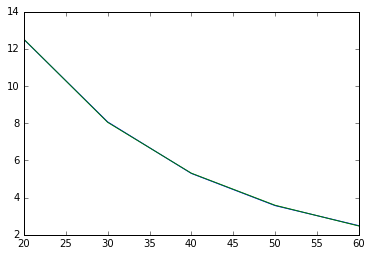

In [4]:
plt.plot(t, result.best_fit)
plt.plot(t, r)

In [5]:
result.best_values

{'mu': 21.234872403615196,
 'r_series': 0.69586241834663587,
 'scale': 30.283548994424557}

### Put this into the Arduino sketch:

In [6]:
def resistance(temperature):
    scale = 30.28
    mu = 21.23
    r_series = 0.696
    return r_series + scale * np.exp(-temperature / mu)